In [2]:
# Requests for handling HTTP get and other requests
import requests # for making HTTP requests
import time # import from standard library for playing nice and not getting blocked
import pandas as pd # to save the data in a dataframe
# from BeautifulSoup4 import BeatifulSoup if installed through pip install BeautifulSoup4
# 
try:
    from bs4 import BeautifulSoup
except ImportError:
    print("Please install BeautifulSoup4 using pip install BeautifulSoup4")

# BeautifulSoup is a Python library for pulling data out of HTML and XML files.

In [3]:
pd.__version__

'2.0.3'

In [ ]:
# if bs4 not found install it with
#  !pip install beatifulsoup4
# https://www.crummy.com/software/BeautifulSoup/

In [ ]:
!dir
# ar ! i can run command line commands

In [4]:
# centrs = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
# url = "https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/"
url = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"

In [5]:
req = requests.get(url) # so here we make a call to webpage via HTTP GET request and get something back
req.status_code # we could add if to check for 200

200

In [7]:
# response is just text - HTML
# first 300 characters
print(req.text[:300])

<!DOCTYPE html>
<HTML lang="lv"><HEAD>
<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>
<meta http-equiv="Content-Type" CONTENT="text/html; charset=UTF-8">
<meta name="viewport" content="user-scalable=1, width=device-width, initial-scale=1.0"/>
<meta name="keywords" c


In [8]:
req.text.count("Stabu")  # we could parse it ourselves but why bother when we have libraries ?

2

In [9]:
req.text.index("Stabu")

16327

In [10]:
type(req)

requests.models.Response

In [ ]:
# req.json() will not work since this page is not JSON!

In [11]:
req.text[req.text.index("Stabu"):req.text.index("Stabu")+100] # we could do parsing by hand but usually we want to use a premade parser

'Stabu</option><option value="5312">Strēlnieku</option><option value="5353">Tallinas</option><option '

In [ ]:
req.text.find("Kluss")
# - 1 Kluss is not found

-1

In [10]:
req.text[req.text.index("Kluss"):req.text.index("Kluss")+100]

'Kluss. Panorāmas skats no logiem. \r\nLaba plānojuma 5 istabu dzīv</a></div></td><td class="msga2-o pp'

## Using Beautiful Soup to extract data from a website

Using string methods is not very efficient when it comes to extracting data from a website. In this notebook, we will use the Beautiful Soup library to extract data from a website. We will extract the title of the website and the first paragraph of the article.

In [14]:
# parser means structuring your text into some structure
soup = BeautifulSoup(req.text, 'lxml') # lxml is improved parser, a little bit more lenient
# soup = BeautifulSoup(req.text) # could use Python's built in HTML parser
soup.title

<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>

In [ ]:
type(soup) # so special type of object - BeautifulSoup

bs4.BeautifulSoup

In [16]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table
tables = soup.find_all("table") # finds ALL elements matching our filter
print(f"Tables found: {len(tables)}")

Tables found: 6


In [17]:
# find finds just one match - first that matches
# tr table row - https://developer.mozilla.org/en-US/docs/Web/HTML/Element/tr
# we know that our headline row has id atrribute with value head_line
headline = soup.find("tr", {"id":"head_line"}) # this is a shorter way of finding by tr AND this element having particular id
headline

<tr id="head_line">
<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Sludinājumi
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
</td>
<td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title

In [18]:
type(headline)

bs4.element.Tag

In [19]:
headline.text  # i could use split here but we can go deeper!

'\n\n\xa0Sludinājumi\r\n\n\n\ndatums\n\nIelaIst.m2StāvsSērijaCena, m2Cena'

In [20]:
# we could split by any whitespace
headline.text.split()
# but again we are not taking advantage of the structure of the HTML

['Sludinājumi', 'datums', 'IelaIst.m2StāvsSērijaCena,', 'm2Cena']

In [21]:
headtds = headline.find_all("td")  # get list of all td tags inside our headline tag only(not the whole document!)
# td stands for table data
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td 
headtds

[<td class="msg_column" colspan="3" width="70%">
 <span style="float:left;"> Sludinājumi
 </span>
 <span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
 <noindex>
 <a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
 </td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title="

In [22]:
print(f"Columns in the table: {len(headtds)}")

Columns in the table: 8


In [ ]:
headline.text # this returns ALL text in headline and its children and grandchildren

In [23]:
headtds[0].text # we do not need the first one

'\n\xa0Sludinājumi\r\n\n\n\ndatums\n'

In [24]:
# so we make a decision to skip the first column
headcolumns = [el.text for el in headtds[1:]] #.text gets us content even from children and grandchildren
headcolumns

['Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija', 'Cena, m2', 'Cena']

In [25]:
# lets combine the above cells into a function which will always get us columns
def getColList(soup, default_cols=("description","url")):
    column_list = list(default_cols) # we decided to that we need these two column names no matter the html
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] # this will get all column names starting with 2nd in HTML
    column_list += headcolumns  # merge both lists, could use extend
    return column_list

In [26]:
column_names = getColList(soup)
column_names # to be used later when creating our table

['description',
 'url',
 'Iela',
 'Ist.',
 'm2',
 'Stāvs',
 'Sērija',
 'Cena, m2',
 'Cena']

In [27]:
trows = soup.find_all('tr') # tr stands for table row
# how many rows do we have?
print(f"Rows found: {len(trows)}")


Rows found: 39


In [ ]:
# if i had no other choices I could find starting and end index by hand and hard code it
# but that is liable to change between pages

In [28]:
trows[9] # we coudl do it by hand

<tr id="tr_55688999"><td class="msga2 pp0"><input id="c55688999" name="mid[]" type="checkbox" value="55688999_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/fcipn.html" id="im55688999"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1294/323395/64678896.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTlCYyU5QSVBMSVBQSVCMyVBNmslOUNsJTlDJUE0JUIxaCVBQmUlOUFjJTk1JUEwJUFDZyVBNWU=|d3epz7u5" href="/msg/lv/real-estate/flats/riga/centre/fcipn.html" id="dm_55688999">Pārdod plašu, ērta plānojuma 4-istabu dzīvokli ērtā atrašanās vi</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Ģertrūdes 63</td><td c="1" class="msga2-o pp6" nowrap="">4</td><td c="1" class="msga2-o pp6" nowrap="">122</td><td c="1" class="msga2-o pp6" nowrap="">5/6</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">1,270 €</td><td c="1" class="msga2-o pp6" nowrap="">155,000  €</td></tr>

In [ ]:
trows[5] # so could take trows[6:35] downside is that this is fixed with magic numbers

In [29]:
trows[9]["id"], trows[5].get("id") # get is safer since not all elements have ids

('tr_55688999', 'tr_54352983')

In [30]:
# hardest part in this 
# how to filter only specific rows
# we need to find something that is unique to our apartment rows but not to the extra rows
# remember we id is not guaranteed, so "" gives us default value when there is no id
apt_rows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
len(apt_rows)

30

In [31]:
# we could have written the above list comprehension as a for loop
apt_rows_also = []
for row in trows:
    id = row.get('id') # default for no id is None
    if id is not None:
        if id.startswith("tr_") and not id.startswith("tr_bnr"):
            apt_rows_also.append(row)

print(f"Apartment rows found: {len(apt_rows_also)}")


Apartment rows found: 30


In [32]:
apt_rows[-1] # last ad

<tr id="tr_55669749"><td class="msga2 pp0"><input id="c55669749" name="mid[]" type="checkbox" value="55669749_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/adign.html" id="im55669749"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1294/323352/64670314.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTdDJTdFJTdDbSU4QyU4OSVBNyVFMWglODIlN0V2aCU5MCU4QyVBNCU5RW4lN0MlODAlN0VmJThDJTgzJUE0JTk1|KKF6XSte7" href="/msg/lv/real-estate/flats/riga/centre/adign.html" id="dm_55669749">Lv
Pārdošanā gaišs un mājīgs divistabu dzīvoklis pēc tikko pabe</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Čaka 45</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">51</td><td c="1" class="msga2-o pp6" nowrap="">3/4</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">2,098 €</td><td c="1" class="msga2-o pp6" nowrap="">107,000  €</td></tr>

In [33]:
apt_rows[0] # first ad

<tr id="tr_54352983"><td class="msga2 pp0"><input id="c54352983" name="mid[]" type="checkbox" value="54352983_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="im54352983"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1227/306572/61314360.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="bSU4QW96JTg5JUUxJUExbyU4NWYlN0MlOEIlOTYlQTJqJTg2b3klOEYlOTUlQTJoJTgyZg==|8R6DXep" href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="dm_54352983">Īpašnieks pārdod dzīvokli renovētā jūgendstila ēkā - Grīziņa Nam</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Augšiela 8</td><td c="1" class="msga2-o pp6" nowrap="">1</td><td c="1" class="msga2-o pp6" nowrap="">22</td><td c="1" class="msga2-o pp6" nowrap="">5/6</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">1,670 €</td><td c="1" class="msga2-o pp6" nowrap="">36,750  €</td></tr>

In [34]:
# lets make a function from the above doodle and make it work on most pages on SS
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [35]:
apt_rows = getRowList(soup)
len(apt_rows)

30

In [36]:
first_ad = apt_rows[0]
first_ad

<tr id="tr_54352983"><td class="msga2 pp0"><input id="c54352983" name="mid[]" type="checkbox" value="54352983_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="im54352983"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1227/306572/61314360.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="bSU4QW96JTg5JUUxJUExbyU4NWYlN0MlOEIlOTYlQTJqJTg2b3klOEYlOTUlQTJoJTgyZg==|8R6DXep" href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="dm_54352983">Īpašnieks pārdod dzīvokli renovētā jūgendstila ēkā - Grīziņa Nam</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Augšiela 8</td><td c="1" class="msga2-o pp6" nowrap="">1</td><td c="1" class="msga2-o pp6" nowrap="">22</td><td c="1" class="msga2-o pp6" nowrap="">5/6</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">1,670 €</td><td c="1" class="msga2-o pp6" nowrap="">36,750  €</td></tr>

In [37]:
row_tds = first_ad.find_all('td') # get all table data elements from first ad/row
len(row_tds)

10

In [38]:
# look at all the data we have
row_tds

[<td class="msga2 pp0"><input id="c54352983" name="mid[]" type="checkbox" value="54352983_1106_0"/></td>,
 <td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="im54352983"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1227/306572/61314360.th2.jpg"/></a></td>,
 <td class="msg2"><div class="d1"><a class="am" data="bSU4QW96JTg5JUUxJUExbyU4NWYlN0MlOEIlOTYlQTJqJTg2b3klOEYlOTUlQTJoJTgyZg==|8R6DXep" href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="dm_54352983">Īpašnieks pārdod dzīvokli renovētā jūgendstila ēkā - Grīziņa Nam</a></div></td>,
 <td c="1" class="msga2-o pp6" nowrap="">Augšiela 8</td>,
 <td c="1" class="msga2-o pp6" nowrap="">1</td>,
 <td c="1" class="msga2-o pp6" nowrap="">22</td>,
 <td c="1" class="msga2-o pp6" nowrap="">5/6</td>,
 <td c="1" class="msga2-o pp6" nowrap="">Renov.</td>,
 <td c="1" class="msga2-o pp6" nowrap="">1,670 €</td>,
 <td c="1" class="msga2-o pp6" nowrap="">36,750  €</td>]

In [39]:
row_tds[0].text

''

In [40]:
row_tds[1].text

''

In [41]:
row_tds[1].attrs # we can see elements attributes

{'class': ['msga2']}

In [42]:
# we can find elements inside our element
img = row_tds[1].find("img") # first img element inside our td element
img

<img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1227/306572/61314360.th2.jpg"/>

In [43]:
img.get("src")

'https://i.ss.com/gallery/7/1227/306572/61314360.th2.jpg'

In [44]:
# let's find for our 2nd td element the first a element, here there is only one
a = row_tds[1].find('a') # a tag is called anchor tag
a

<a href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="im54352983"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1227/306572/61314360.th2.jpg"/></a>

In [45]:
a.attrs

{'href': '/msg/lv/real-estate/flats/riga/centre/ccnfo.html',
 'id': 'im54352983'}

In [ ]:
a.get('href'), a['href'] # anchors should have href attribute
# in general get is safer since it does not throw an error if key is not found

('/msg/lv/real-estate/flats/riga/centre/ccnfo.html',
 '/msg/lv/real-estate/flats/riga/centre/ccnfo.html')

In [47]:
prefix = "https://www.ss.com"
prefix + a.get('href')

'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/ccnfo.html'

In [48]:
row_tds[2].text # 3rd element has the description

'Īpašnieks pārdod dzīvokli renovētā jūgendstila ēkā - Grīziņa Nam'

In [49]:
row_tds[-1].text # last element has the price

'36,750  €'

In [50]:
column_names # we got these first

['description',
 'url',
 'Iela',
 'Ist.',
 'm2',
 'Stāvs',
 'Sērija',
 'Cena, m2',
 'Cena']

In [51]:
# from row get dictionary with values 
def getRow(row, colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    # we start with description
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    # then url
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    # rest of columns can vary depending on type of ad
    # so we loop through all remaining columns
    for key,td in zip(colist[2:],row_tds[3:]): 
        rowDict[key] = td.text
    return rowDict

In [52]:
apt_rows[0] # first row of ads

<tr id="tr_54352983"><td class="msga2 pp0"><input id="c54352983" name="mid[]" type="checkbox" value="54352983_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="im54352983"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/7/1227/306572/61314360.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="bSU4QW96JTg5JUUxJUExbyU4NWYlN0MlOEIlOTYlQTJqJTg2b3klOEYlOTUlQTJoJTgyZg==|8R6DXep" href="/msg/lv/real-estate/flats/riga/centre/ccnfo.html" id="dm_54352983">Īpašnieks pārdod dzīvokli renovētā jūgendstila ēkā - Grīziņa Nam</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Augšiela 8</td><td c="1" class="msga2-o pp6" nowrap="">1</td><td c="1" class="msga2-o pp6" nowrap="">22</td><td c="1" class="msga2-o pp6" nowrap="">5/6</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">1,670 €</td><td c="1" class="msga2-o pp6" nowrap="">36,750  €</td></tr>

In [53]:
getRow(apt_rows[0])

{'description': 'Īpašnieks pārdod dzīvokli renovētā jūgendstila ēkā - Grīziņa Nam',
 'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/ccnfo.html',
 'Iela': 'Augšiela 8',
 'Ist.': '1',
 'm2': '22',
 'Stāvs': '5/6',
 'Sērija': 'Renov.',
 'Cena, m2': '1,670 €',
 'Cena': '36,750  €'}

In [54]:
getRow(first_ad)

{'description': 'Īpašnieks pārdod dzīvokli renovētā jūgendstila ēkā - Grīziņa Nam',
 'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/ccnfo.html',
 'Iela': 'Augšiela 8',
 'Ist.': '1',
 'm2': '22',
 'Stāvs': '5/6',
 'Sērija': 'Renov.',
 'Cena, m2': '1,670 €',
 'Cena': '36,750  €'}

In [55]:
# so if we know how to work on single row then we can do process multiple rows
def getRows(rowlist, colist=column_names):
    # we could use list comprehension
    # return [getRow(row, colist=colist) for row in rowlist] # so return a list of dictionaries
    # we could use regular for loop
    rowdicts = []
    # so for each row of ads we get a dictionary
    for row in rowlist:
        rowdicts.append(getRow(row, colist=colist))
    return rowdicts

In [56]:
row_ads = getRows(apt_rows)
row_ads[-3:] # last 3 ads

[{'description': 'Pārdod gaišu dzīvokli Blaumaņa ielā 11/13 pagalma mājā. \r\nDzīvok',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/aenkm.html',
  'Iela': 'Blaumaņa 11/13',
  'Ist.': '4',
  'm2': '108',
  'Stāvs': '5/6',
  'Sērija': 'P. kara',
  'Cena, m2': '1,481 €',
  'Cena': '160,000  €'},
 {'description': 'Pārdod dzīvokli Blaumaņa ielā 11/13 fasādes mājā. \r\nDzīvokļa kop',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/bbkfc.html',
  'Iela': 'Blaumaņa 11/13',
  'Ist.': '5',
  'm2': '128',
  'Stāvs': '2/5',
  'Sērija': 'P. kara',
  'Cena, m2': '1,998 €',
  'Cena': '255,800  €'},
 {'description': 'Lv\r\nPārdošanā gaišs un mājīgs divistabu dzīvoklis pēc tikko pabe',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/adign.html',
  'Iela': 'Čaka 45',
  'Ist.': '2',
  'm2': '51',
  'Stāvs': '3/4',
  'Sērija': 'Renov.',
  'Cena, m2': '2,098 €',
  'Cena': '107,000  €'}]

In [57]:
type(row_ads), len(row_ads) # list of dictionaries for each ad

(list, 30)

In [ ]:
# such a list of dictionaries is easy to convert into a DataFrame in pandas

In [ ]:
# i am converting my list of dictionaries into a DataFrame
# dtemp = pd.DataFrame(row_ads, columns=column_names)
dtemp = pd.DataFrame(row_ads) # no need for columns if we have them in the dictionary
dtemp.shape

(30, 9)

In [59]:
dtemp.head() # first 5 rows

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,1,22,5/6,Renov.,"1,670 €","36,750 €"
1,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,30,6/6,Renov.,"1,517 €","45,500 €"
2,Projekta attīstītājs pārdod dzīvokli renovētā ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,35,6/6,Renov.,"1,484 €","51,950 €"
3,Trīs istabu dzīvoklis atrodas neorenesanses ar...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 26A,3,101,3/6,Renov.,"2,228 €","225,000 €"
4,"Pārdod plašu, ērta plānojuma 4-istabu dzīvokli...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Ģertrūdes 63,4,122,5/6,P. kara,"1,270 €","155,000 €"


In [60]:
dtemp.to_excel("rigas_centrs_nov11.xlsx")

In [61]:
# so with this function I can get full dataframe from a single page on ss.com not only apartments
def getDFfromURL(url):
    # print("getting data from", url)
    req = requests.get(url) # here we make a request to a server
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None # maybe return empty dataframe here
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows_dict = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows_dict)
    

In [62]:
centrs = url
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [63]:
imanta = "https://www.ss.com/lv/real-estate/flats/riga/imanta/sell/"
idf = getDFfromURL(imanta)
idf.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,"Īpašnieks pārdod gaišu, siltu vienistabas dzīv...",https://ss.com/msg/lv/real-estate/flats/riga/i...,Kurzemes pr. 130,1,36,7/9,602.,"1,528 €","55,000 €"
1,"Продает хозяин , все весь ремонт делался под с...",https://ss.com/msg/lv/real-estate/flats/riga/i...,Kleistu 15,1,36,2/8,602.,"1,497 €","53,900 €"
2,"Elitārs dzīvoklis mājā ar trenažieru zāli, sau...",https://ss.com/msg/lv/real-estate/flats/riga/i...,Anniņmuižas 38,4,122,4/18,Jaun.,"2,008 €","245,000 €"
3,"Mūsdienīgs trīs istabu dzīvoklis, mainīts plān...",https://ss.com/msg/lv/real-estate/flats/riga/i...,Progresa 2a,3,70,12/12,104.,"1,427 €","99,900 €"
4,Pārdošanā 2 istabu dzīvoklis ar parkošanās vie...,https://ss.com/msg/lv/real-estate/flats/riga/i...,Anniņmuižas 38/k3,2,60,4/18,Jaun.,"1,817 €","109,000 €"


In [64]:
df = getDFfromURL(centrs) # this will involve calling web page

In [65]:
url

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [ ]:
df = getDFfromURL(url)
df.shape

In [66]:
df.shape

(30, 9)

In [67]:
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Dzīvoklis tikko pēc remonta. \r\nDzīvojamā ist...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Valdemāra 73,3,66,6/6,P. kara,"2,500 €","165,000 €"
1,"Tikko pēc kapitāla remonta. Augstais stāvs, k...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Katrīnas d. 22,3,66,1/4,Specpr.,"1,423 €","93,900 €"
2,Kluss. Panorāmas skats no logiem. \r\nLaba plā...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Teātra 12,5,136,6/7,P. kara,"2,000 €","272,000 €"
3,Vairāki pakāpieni uz leju. \r\nDaļa maksas var...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Duntes 26,3,67,1/6,Specpr.,143 €,"9,580 €"
4,Pārdodam dzīvokļus ēkā ar vēstures garšu. Reno...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Tomsona 33,3,64,4/5,Renov.,"2,180 €","139,500 €"


In [68]:
# anchors are our friends - the basic building blocks of HTML - linking to other pages
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/a
anchors = soup.find_all("a") # returns a list of all anchor elements
print(f"Found {len(anchors)} anchor elements") # anchors are the basic building blocks of HTML

Found 99 anchor elements


In [67]:
anchors[:5]

[<a href="/lv/" title="Sludinājumi"><img alt="Sludinājumi" border="0" class="page_header_logo" src="https://i.ss.com/img/p.gif"/></a>,
 <a class="a_menu" href="/lv/real-estate/flats/new/" title="Iesniegt Sludinājumu">Iesniegt Sludinājumu</a>,
 <a class="a_menu" href="/lv/login/" title="Mani Sludinājumi">Mani Sludinājumi</a>,
 <a class="a_menu" href="/lv/real-estate/flats/riga/centre/search/" title="Meklēt sludinājumus">Meklēšana</a>,
 <a class="a_menu" href="/lv/favorites/" title="Memo">Memo</a>]

In [69]:
navs = [anchor for anchor in anchors if anchor.get("name") == "nav_id"] # get will get us None if no "name" exists
len(navs)

10

In [70]:
navs

[<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page31.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page2.html" name="nav_id" rel="next">2</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page3.html" name="nav_id" rel="next">3</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page4.html" name="nav_id" rel="next">4</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page5.html" name="nav_id" rel="next">5</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page6.html" name="nav_id" rel="next">6</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page7.html" name="nav_id" rel="next">7</a>,
 <a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page8.html" name="nav_id" rel="next">8</a>,
 <a class="navi" href="/lv/real-est

In [71]:
navs[0]

<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page31.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>

In [72]:
navs[0].attrs

{'name': 'nav_id',
 'rel': ['prev'],
 'class': ['navi'],
 'href': '/lv/real-estate/flats/riga/centre/sell/page31.html'}

In [73]:
navs[0]['href']

'/lv/real-estate/flats/riga/centre/sell/page31.html'

In [74]:
# could use regular expression here but we can use split 
afterpage = navs[0]['href'].split("/page")[-1] # -1 might be safer than 1 in case there is region with name page
afterpage

'31.html'

In [ ]:
beforedot = afterpage.split(".html")[0]
beforedot # we get a string of a number

'31'

In [76]:
# finally we need to convert string to integer
lastpage = int(beforedot)
lastpage

31

In [ ]:
# so now wbe put everything we just did in a single function

In [77]:
# instead of getting first element from list we can use find
prevanchor = soup.find('a', {"rel":"prev"})
prevanchor

<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page31.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>

In [78]:
def getAllLocalUrls(url):
    """Get a list of all urls including paginated pages"""
    results = [url] # default is just the url if no extra pages found, teiksim Bolderājai...
    req = requests.get(url)
    if req.status_code != 200:
        print(f"Bad response! {req.status_code}")
        return []
    soup = BeautifulSoup(req.text, 'lxml')
    # we just need a one element
    prevanchor = soup.find('a', {"rel":"prev"}) # find finds first match only
    if prevanchor == None: # means there is only one page of ads
        return results # we return just the original first page
    href = prevanchor.attrs.get('href')
    # so split by /page and then take last element and split by .html and take first element
    # finally convert to integer
    lastPageNum = int(href.split('/page')[-1].split('.html')[0])
    print("Last page is",lastPageNum)
    new_urls = [f"{url}page{n}.html" for n in range(2,lastPageNum+1)]
    results += new_urls # add new urls to our list
    return results

In [79]:
url

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [ ]:
centrs = url # alias # not a copy

In [82]:
local_urls = getAllLocalUrls(url)
len(local_urls),local_urls[:3],local_urls[-1]

Last page is 30


(30,
 ['https://www.ss.com/lv/real-estate/flats/riga/centre/sell/',
  'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html',
  'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html'],
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page30.html')

In [71]:
local_urls

['https://www.ss.com/lv/real-estate/flats/riga/centre/sell/',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page12.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page13.html',
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page14.html

In [83]:
dlast = getDFfromURL(local_urls[-1])
dlast.shape

(30, 9)

In [84]:
dlast

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Investīciju komplekss - 4 dzīvokļi vienā ēkā p...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Dzirnavu 157,Citi,270,2/3,P. kara,722 €,"195,000 €"
1,Iegādei tiek piedāvāts elegants un plašs 5 ist...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Alberta 4,5,193,2/4,P. kara,"4,896 €","945,000 €"
2,Dzīvoklim ir vides pieejamība. Piemērots arī m...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Artilērijas 11,3,62,1/4,Renov.,"1,355 €","84,000 €"
3,Pārdod plašu 4 istabu dzīvokli Rīgas Klusajā C...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Republikas laukums..,4,123,3/6,Jaun.,"2,236 €","275,000 €"
4,Tiek pārdtos 3-istabu dzīvoklis. Visas istabas...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Gogoļa 13,3,75,5/6,P. kara,"1,600 €","120,000 €"
5,"Jaunais projekts , Lilien” , kura nosaukums ra...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Laboratorijas 5,3,68,2/5,Jaun.,"2,424 €","164,800 €"
6,"Jaunais projekts , Lilien” , kura nosaukums ra...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Laboratorijas 5,3,62,3/5,Jaun.,"2,497 €","154,800 €"
7,"Divlīmeņu dzīvoklis renovētā mājā, kura atroda...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Raiņa bulv. 9,3,144,6/6,Renov.,"2,931 €","422,000 €"
8,Pārdod 3 izolētu istabu dzīvokli\r\n\r\nDzīvok...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Duntes 23,3,74,1/4,Staļina,782 €,"57,900 €"
9,"2 - istabu dzīvoklis, atrodas 12 stāvu ēkā, no...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Katrīnas d. 27,2,46,3/12,Renov.,"2,000 €","92,000 €"


In [85]:
def get_all_ads_df(start_url, save_excel_path=None, delay=0.3):
    df_list=[] # so we will save our dataframes in a list
    # first get the urls of all pages that we want to scrape
    local_urls = getAllLocalUrls(start_url)
    # simply loop through all urls and get the dataframes
    for url in local_urls:
        print(f"Gathering data from {url}")
        df_list.append(getDFfromURL(url))
        time.sleep(delay) # we need this to play nice! to avoid rate limit or IP ban!!
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    big_df = pd.concat(df_list, ignore_index=True) # then make a big dataframe from all the small dataframes
    if save_excel_path:
        print(f"Saving to {save_excel_path}")
        big_df.to_excel(save_excel_path)
    return big_df
    

In [86]:
centrs = url
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [87]:
centra_df = get_all_ads_df(centrs, save_excel_path="centrs_dzivokli_nov11.xlsx")

Last page is 31
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html
Gathering data from http

In [88]:
centra_df.head(10)

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Pārdošanā 4-istabu dzīvoklis ar 3 guļamistabām...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 27/29,4,144,4/6,Renov.,"2,118 €","305,000 €"
1,"Labs piedāvājums tiem, kas vēlas dzīvot pašā R...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Tērbatas 50,3,80,2/5,P. kara,"2,000 €","160,000 €"
2,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,1,22,5/6,Renov.,"1,670 €","36,750 €"
3,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,30,6/6,Renov.,"1,517 €","45,500 €"
4,Projekta attīstītājs pārdod dzīvokli renovētā ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,35,6/6,Renov.,"1,484 €","51,950 €"
5,Trīs istabu dzīvoklis atrodas neorenesanses ar...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 26A,3,101,3/6,Renov.,"2,228 €","225,000 €"
6,"Pārdod plašu, ērta plānojuma 4-istabu dzīvokli...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Ģertrūdes 63,4,122,5/6,P. kara,"1,270 €","155,000 €"
7,"Īpašnieks pārdod gaišu, mājīgu divu istabu dzī...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Alauksta 9,2,74,3/6,Jaun.,"1,948 €","144,119 €"
8,Pārdod 2 istabu dzīvokli Eksporta ielā 10. Dzī...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Eksporta 10,2,32,1/5,Staļina,"1,823 €","58,320 €"
9,Divstāvu dzīvoklis ar terasi un skatu uz Dauga...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Eksporta 12,3,81,6/7,Staļina,"2,099 €","170,000 €"


In [ ]:
url

In [ ]:
riga_region = get_all_ads_df(url, "riga_region_sep28.xlsx")

In [ ]:
riga_region.shape

In [ ]:
riga_region.head(10)

In [ ]:
riga_region.tail(10)

In [76]:
agens = "https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/"
df = get_all_ads_df(agens, "agens_30_06.xlsx")
df.head()

Last page is 5
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page5.html


,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Dzīvoklis vēsturiskā mājā ar stāvvietu un zaļo...,https://ss.com/msg/lv/real-estate/flats/riga/a...,Tukuma 3,1,27,3/3,P. kara,"1,741 €","47,000 €"
1,"В продаже просторная, светлая, теплая, квартир...",https://ss.com/msg/lv/real-estate/flats/riga/a...,Nometņu 57,1,37,1/2,P. kara,673 €,"24,900 €"
2,"Pārdodu plašu, gaišu, siltu dzīvokli. Privatiz...",https://ss.com/msg/lv/real-estate/flats/riga/a...,Daugavgrīvas 55,2,48,1/2,P. kara,913 €,"43,800 €"
3,"Tiek piedāvāts dzīvoklis labā stāvoklī, bez pā...",https://ss.com/msg/lv/real-estate/flats/riga/a...,Mērsraga 13,2,41,1/4,Hrušč.,"1,146 €","47,000 €"
4,Pārdošanā dzīvoklis unikālā projektā Filozofu ...,https://ss.com/msg/lv/real-estate/flats/riga/a...,Raņķa d. 34,3,95,7/22,Jaun.,"2,222 €","211,100 €"


In [89]:
centra_df.shape

(901, 9)

In [ ]:
df = centra_df  # alias it is common to use df as a variable name for a dataframe
# that was not a copy but an alias!
df.shape

(901, 9)

In [ ]:
df.shape

In [91]:
df.columns

Index(['description', 'url', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija',
       'Cena, m2', 'Cena'],
      dtype='object')

## Some Data Wrangling with Pandas

In [92]:
# we can get basic info about our dataframe
df.info()
# objects mean strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  901 non-null    object
 1   url          901 non-null    object
 2   Iela         901 non-null    object
 3   Ist.         901 non-null    object
 4   m2           901 non-null    object
 5   Stāvs        901 non-null    object
 6   Sērija       901 non-null    object
 7   Cena, m2     901 non-null    object
 8   Cena         901 non-null    object
dtypes: object(9)
memory usage: 63.5+ KB


In [93]:
# last 5
df.tail()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
896,"Saimnieks pārdošanā piedāvā plašu, saulainu če...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Hospitāļu 1,4,89,6/7,Specpr.,"1,461 €","130,000 €"
897,"Īpašnieks pārdod unikālas telpas gan biznesam,...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Tallinas 32,2,52,1/4,P. kara,"1,505 €","78,255 €"
898,Tiek pārdots dzīvoklis pilnīgi renovētā ēkā pa...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Ģertrūdes 23,3,81,2/7,Renov.,"2,963 €","240,000 €"
899,"Privāts pagalms, sakārtota vide, tikko renovēt...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Matīsa 29,1,29,1/3,Renov.,"2,310 €","67,000 €"
900,Pilsētas centrā tiek pārdots skaists vienas gu...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Dzirnavu 149A,2,42,1/4,Staļina,"1,310 €","55,000 €"


In [94]:
#we can do more post processing - feature engineering using existing columns
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor
0,Pārdošanā 4-istabu dzīvoklis ar 3 guļamistabām...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 27/29,4,144,4/6,Renov.,"2,118 €","305,000 €",4,6
1,"Labs piedāvājums tiem, kas vēlas dzīvot pašā R...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Tērbatas 50,3,80,2/5,P. kara,"2,000 €","160,000 €",2,5
2,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,1,22,5/6,Renov.,"1,670 €","36,750 €",5,6
3,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,30,6/6,Renov.,"1,517 €","45,500 €",6,6
4,Projekta attīstītājs pārdod dzīvokli renovētā ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,35,6/6,Renov.,"1,484 €","51,950 €",6,6


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  901 non-null    object
 1   url          901 non-null    object
 2   Iela         901 non-null    object
 3   Ist.         901 non-null    object
 4   m2           901 non-null    object
 5   Stāvs        901 non-null    object
 6   Sērija       901 non-null    object
 7   Cena, m2     901 non-null    object
 8   Cena         901 non-null    object
 9   Floor        901 non-null    object
 10  MaxFloor     901 non-null    object
dtypes: object(11)
memory usage: 77.6+ KB


In [96]:
df["price"] = df.Cena.str.split(' ').str[0]  # create a new column from price
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price
0,Pārdošanā 4-istabu dzīvoklis ar 3 guļamistabām...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 27/29,4,144,4/6,Renov.,"2,118 €","305,000 €",4,6,"305,000"
1,"Labs piedāvājums tiem, kas vēlas dzīvot pašā R...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Tērbatas 50,3,80,2/5,P. kara,"2,000 €","160,000 €",2,5,"160,000"
2,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,1,22,5/6,Renov.,"1,670 €","36,750 €",5,6,"36,750"
3,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,30,6/6,Renov.,"1,517 €","45,500 €",6,6,"45,500"
4,Projekta attīstītājs pārdod dzīvokli renovētā ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,35,6/6,Renov.,"1,484 €","51,950 €",6,6,"51,950"


In [97]:
# so we remove , from price and convert it to integer at the same time
# then we overwrite the old column with the new one
df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer int64 for larger
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price
0,Pārdošanā 4-istabu dzīvoklis ar 3 guļamistabām...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 27/29,4,144,4/6,Renov.,"2,118 €","305,000 €",4,6,305000
1,"Labs piedāvājums tiem, kas vēlas dzīvot pašā R...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Tērbatas 50,3,80,2/5,P. kara,"2,000 €","160,000 €",2,5,160000
2,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,1,22,5/6,Renov.,"1,670 €","36,750 €",5,6,36750
3,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,30,6/6,Renov.,"1,517 €","45,500 €",6,6,45500
4,Projekta attīstītājs pārdod dzīvokli renovētā ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,35,6/6,Renov.,"1,484 €","51,950 €",6,6,51950


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  901 non-null    object
 1   url          901 non-null    object
 2   Iela         901 non-null    object
 3   Ist.         901 non-null    object
 4   m2           901 non-null    object
 5   Stāvs        901 non-null    object
 6   Sērija       901 non-null    object
 7   Cena, m2     901 non-null    object
 8   Cena         901 non-null    object
 9   Floor        901 non-null    object
 10  MaxFloor     901 non-null    object
 11  price        901 non-null    int32 
dtypes: int32(1), object(11)
memory usage: 81.1+ KB


In [99]:
# convert to integer
# we will createa a new column called floor - column names are case sensitive
df["floor"] = df.Floor.astype('int32')
# in Pandas we can use df.column_name or df["column_name"]
# df["column_name"] is more flexible as we can use variables 
# also df.column_name will not work if column name has spaces or special characters
# also df.column_name will not work if column name is a number
# finally df.column_name will not work if column name is a reserved word in Python or in Pandas

In [100]:
df.m2 = df.m2.astype('int32')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  901 non-null    object
 1   url          901 non-null    object
 2   Iela         901 non-null    object
 3   Ist.         901 non-null    object
 4   m2           901 non-null    int32 
 5   Stāvs        901 non-null    object
 6   Sērija       901 non-null    object
 7   Cena, m2     901 non-null    object
 8   Cena         901 non-null    object
 9   Floor        901 non-null    object
 10  MaxFloor     901 non-null    object
 11  price        901 non-null    int32 
 12  floor        901 non-null    int32 
dtypes: int32(3), object(10)
memory usage: 81.1+ KB


In [102]:
df.MaxFloor = df.MaxFloor.astype('int32')
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price,floor
0,Pārdošanā 4-istabu dzīvoklis ar 3 guļamistabām...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 27/29,4,144,4/6,Renov.,"2,118 €","305,000 €",4,6,305000,4
1,"Labs piedāvājums tiem, kas vēlas dzīvot pašā R...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Tērbatas 50,3,80,2/5,P. kara,"2,000 €","160,000 €",2,5,160000,2
2,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,1,22,5/6,Renov.,"1,670 €","36,750 €",5,6,36750,5
3,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,30,6/6,Renov.,"1,517 €","45,500 €",6,6,45500,6
4,Projekta attīstītājs pārdod dzīvokli renovētā ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,35,6/6,Renov.,"1,484 €","51,950 €",6,6,51950,6


In [ ]:
df.head()

In [103]:
# I can sort by column name
sorted_df = df.sort_values(by="price",ascending=False)
sorted_df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price,floor
733,Visaugstākajām prasībām atbilstošs dzīvoklis v...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Lāčplēša 11,4,279,7/7,Jaun.,"6,989 €","1,950,000 €",7,7,1950000,7
113,"Ekskluzīvs penthauss centrā, Vecrīgas krastmal...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Miesnieku 14,6,350,5/5,Renov.,"3,200 €","1,120,000 €",5,5,1120000,5
185,Эксклюзивные двухуровневые апартаменты в одном...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Ausekļa 2,5,247,1/5,Renov.,"4,000 €","988,000 €",1,5,988000,1
181,Penthouse apartamenti jaunajā rekonstruētajā p...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Ausekļa 14,4,253,6/6,Renov.,"3,874 €","980,000 €",6,6,980000,6
872,Iegādei tiek piedāvāts elegants un plašs 5 ist...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Alberta 4,5,193,2/4,P. kara,"4,896 €","945,000 €",2,4,945000,2


In [104]:
# we could see the cheapest
df.sort_values(by="price",ascending=True).head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price,floor
536,Nomaksa. Vairāki pakāpieni uz leju. \r\nDaļa m...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Duntes 26,3,67,1/6,Specpr.,128 €,"8,580 €",1,6,8580,1
149,"Dzīvoklis ēkā, kas šobrīd ir neapdzīvojama un ...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Valdemāra 40A,2,34,3/3,P. kara,279 €,"9,500 €",3,3,9500,3
211,Pārdodam nelielu dzīvokli. \r\nPilnībā gatavs ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Ieroču 6,1,16,2/2,P. kara,656 €,"10,500 €",2,2,10500,2
868,Pārdod studio tipa dzīvokli 16kv. m Brasas raj...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Ieroču 6,1,16,1/2,P. kara,725 €,"11,600 €",1,2,11600,1
420,Tiek pārdots divistabu dzīvoklis ar izolētām i...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Ieroču 6,2,35,2/2,P. kara,366 €,"12,800 €",2,2,12800,2


In [105]:
# now that we have numerical values we can do some statistics
df.describe() # describe will give us basic statistics for all numeric columns

,m2,MaxFloor,price,floor
count,901.000000,901.000000,9.010000e+02,901.000000
mean,79.469478,5.572697,1.641871e+05,3.336293
std,59.943255,2.507431,1.487232e+05,2.102671
min,16.000000,1.000000,8.580000e+03,1.000000
25%,45.000000,5.000000,7.500000e+04,2.000000
50%,63.000000,5.000000,1.250000e+05,3.000000
75%,97.000000,6.000000,1.968000e+05,5.000000
max,1000.000000,29.000000,1.950000e+06,23.000000


In [106]:
# i can filter by column value
# so here we will get all rows where floor is greater than 2
df[df.floor > 2].head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price,floor
0,Pārdošanā 4-istabu dzīvoklis ar 3 guļamistabām...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 27/29,4,144,4/6,Renov.,"2,118 €","305,000 €",4,6,305000,4
2,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,1,22,5/6,Renov.,"1,670 €","36,750 €",5,6,36750,5
3,Īpašnieks pārdod dzīvokli renovētā jūgendstila...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,30,6/6,Renov.,"1,517 €","45,500 €",6,6,45500,6
4,Projekta attīstītājs pārdod dzīvokli renovētā ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Augšiela 8,2,35,6/6,Renov.,"1,484 €","51,950 €",6,6,51950,6
5,Trīs istabu dzīvoklis atrodas neorenesanses ar...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 26A,3,101,3/6,Renov.,"2,228 €","225,000 €",3,6,225000,3


In [107]:
df.sort_values(by="MaxFloor",ascending=False).head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price,floor
135,Pārdod tikko pēc remonta plašu 3-istabu dzīvok...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Grostonas 25,3,86,6/29,Jaun.,"2,713 €","233,280 €",6,29,233280,6
718,Pārdodu mēbelētu dzīvokli. Dzīvoklis sastāv no...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Miera 93,2,51,2/25,Jaun.,"2,353 €","120,000 €",2,25,120000,2
731,Вам важно жить в одном ритме с городом и при э...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Skanstes 29а,3,229,23/24,Jaun.,"2,336 €","535,000 €",23,24,535000,23
319,Dzīvoklis ar vietu pazemes stāvvietā un mantu ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Skanstes 29a,3,110,8/24,Jaun.,"2,272 €","249,900 €",8,24,249900,8
24,Продается квартира c большой террасой в новом ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Skanstes 29,2,61,3/24,Jaun.,"2,049 €","125,000 €",3,24,125000,3


In [ ]:
df.head()

In [ ]:
df.columns

In [108]:
grouped_by_street = df.groupby(by="Iela")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_street

,count,min,max,mean
Iela,,,,
Akas 2,1,135000,135000,135000.0
Akas 8,1,300000,300000,300000.0
Alauksta 9,2,107000,144119,125559.5
Alberta 4,1,945000,945000,945000.0
Aldaru 6,1,170000,170000,170000.0
...,...,...,...,...
Ģertrūdes 63,1,155000,155000,155000.0
Ģertrūdes 65/2,8,99000,156000,130875.0
Ģertrūdes 77,1,187000,187000,187000.0


In [109]:
grouped_by_series = df.groupby(by="Sērija")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_series

,count,min,max,mean
Sērija,,,,
103.,5,43001,89900,59980.000000
467.,1,55000,55000,55000.000000
Hrušč.,18,36500,119000,60572.222222
Jaun.,135,38000,1950000,243141.948148
LT proj.,1,52000,52000,52000.000000
P. kara,373,9500,945000,139650.252011
Priv. m.,2,118900,140000,129450.000000
Renov.,290,35000,1120000,179396.506897
Specpr.,41,8580,475000,129810.731707


In [110]:
grouped_by_floor = df.groupby(by="floor")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_floor

,count,min,max,mean
floor,,,,
1,178,8580,988000,105499.269663
2,196,10500,945000,149893.520408
3,141,9500,799000,162422.985816
4,136,21500,750000,166738.308824
5,131,36750,1120000,197266.969466
6,88,35200,980000,204203.045455
7,17,115000,1950000,427111.764706
8,7,89000,249900,156085.714286
11,2,55000,187162,121081.000000


<Axes: >

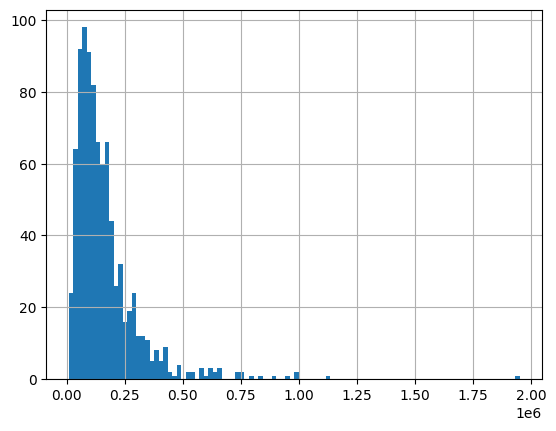

In [111]:
## Let's plot price histogram for all prices
df.price.hist(bins=100) # histogram is a way to show distribution of numerical data

<Axes: >

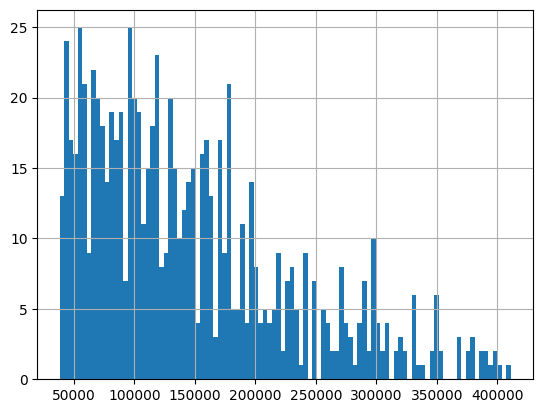

In [112]:
## lets plot price histogram ignoring top 5 and bottom 5 outliers
df.price.hist(bins=100, range=(df.price.quantile(0.05),df.price.quantile(0.95)))

In [ ]:
len(grouped_by_floor)

In [ ]:
grouped_by_floor.hist(bins=len(grouped_by_floor))

In [ ]:
grouped_by_pag = df.groupby(by="Pagasts")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_pag

In [ ]:
grouped_by_pag.hist()

In [ ]:
grouped_by_pag.plot(x="Pagasts", y="mean")

In [ ]:
df.to_excel("c:/temp/my_apartments.xlsx") # i could this with absolute path

In [105]:
from datetime import datetime as dt
now = dt.now()
now.month, now.day, now.hour, now.second

(5, 11, 20, 16)

In [ ]:
# url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
url = centrs
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"
save_path

In [106]:
url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
region = url.split("riga/")[-1].split("/")[0] # to automate the region name
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"

df = get_all_ads_df(url, save_path)

Gathering data from https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/
Saving to ../data/sarkandaugava_11_5__20_28.xlsx


In [ ]:
url = "https://www.ss.com/lv/transport/cars/vaz/riga_f/"
df = get_all_ads_df(url, "../data/vaz_18_03.xlsx")

# TODO 
# Try with different starting address not only centrs
## Maybe combine regions
## See how it would work with maybe cars
## Data engineering make new columns based on existing ones, clean some columns
### Changing floors 2/6 to columns 2 and 6, clean up Euro signs
## Sorting, Describing, Grouping by regions etc

In [ ]:
df = pd.read_excel("centrs_10_03.xlsx")
df.head()

In [ ]:
df.shape

In [ ]:
df["price"] = df.Cena.str.split(' ').str[0]
df.head()

In [ ]:
df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer
df.head()

In [ ]:
df.price.hist()

In [ ]:
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.info()

In [ ]:
#typecasting example
df.Floor = df.Floor.astype('int32')
df.MaxFloor = df.MaxFloor.astype('int32')

In [ ]:
df.head()

In [ ]:
d23 = df[df.MaxFloor > 20]
d23

In [ ]:
df.describe().T # T is for transposing rows and columns

In [ ]:
df.describe().T.to_csv("center_stats.csv")

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(df, x="price", nbins=100)
fig.show()

In [ ]:
import seaborn as sns # seaborn sits on top of matplotlib with better defaults
import matplotlib.pyplot as plt


In [ ]:
df.info()

In [ ]:
# Basic correlogram
sns.pairplot(df)



In [ ]:
# Basic correlogram
sns.pairplot(df)



In [ ]:
volvo_url = "https://www.ss.com/lv/transport/cars/volvo/sell/"
volvos = get_all_ads_df(volvo_url, "../data/volvo_03_18.xlsx")

In [ ]:
volvos = pd.read_excel("volvo_270921.xlsx")
volvos.head()

In [ ]:
volvos.shape

In [ ]:
volvos.head(10)

In [ ]:
gr_auto['Price'] = 

In [ ]:
volvos["price"] = volvos.Cena.str.split(' ').str[0]
volvos.price = volvos.price.str.replace(",","").astype('int32')
volvos.head()

In [ ]:

gr_auto = volvos.groupby(["Gads","Modelis"])["price"].agg(["count", "min", "max", "mean", ])  #.head(n = 10)
gr_auto

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(0).str.contains("2015")] # how to filter multi level index

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(1).str.contains("S60")]

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(1).str.contains("S60")].to_excel("S60.xlsx")

In [ ]:
print(dt.today())

In [ ]:
suzuki_url = "https://www.ss.com/lv/transport/cars/suzuki/"
# sdf = get_all_ads_df(suzuki_url, f"suzuki_{dt.today()}.xlsx")
sdf = get_all_ads_df(suzuki_url, f"suzuki.xlsx")
sdf.head()

In [ ]:
sdf.info()

In [ ]:
sdf["Tilp."] = sdf["Tilp."].str.replace("\w","", regex=True)
sdf.head()

In [ ]:
sdf["Nobrauk."] = sdf["Nobrauk."].str.replace("\D","", regex=True) # so no digits removed
sdf.head()

In [ ]:
sdf["Cena"] = sdf["Cena"].str.replace("\D","", regex=True) # so no digits removed
sdf.head()

In [ ]:
sdf = sdf.dropna(how="any", axis=0)
sdf

In [ ]:
sdf = sdf[sdf["Nobrauk."].str.len() > 0] # got rid of those empty rows finally
sdf

In [ ]:
sdf["Cena"] = sdf["Cena"].astype("float32")

In [ ]:
gr_auto = sdf.groupby(["Gads","Modelis"])["Cena"].agg(["count","min", "max", "mean"]) 
gr_auto